## Siddhant Ashwani, BL.EN.U4CSE21189

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
data = pd.read_excel('/content/embeddingsdata.xlsx')
df = pd.DataFrame(data)

A1. Merge your train & test sets and remove the class labels. Use k-means algorithm with k = 3 or 5 (based on your dataset) to form the clusters.

In [3]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
XTrain, Xtest, yTrain, yTest = train_test_split(X, y, test_size= 0.2, random_state = 42)
mergedX = pd.concat([XTrain, Xtest], axis = 0)
mergedy = pd.concat([yTrain, yTest], axis = 0)
mergedData = pd.DataFrame(data=np.c_[mergedX, mergedy], columns=list(X.columns) + ['label'])
mergedData.reset_index(drop=True, inplace=True)
mergedDataWithoutLabels = mergedData.drop('label' , axis = 1)
print(mergedDataWithoutLabels.head())

    embed_0   embed_1   embed_2   embed_3   embed_4   embed_5   embed_6  \
0 -0.006776 -0.030313  0.026364  0.025784 -0.000306  0.019891 -0.071866   
1  0.023304 -0.041007  0.008178  0.036862 -0.001802  0.020734 -0.049504   
2  0.006877 -0.029370  0.036910  0.047952 -0.005241  0.015871 -0.064143   
3  0.011828 -0.033479  0.012525  0.038121 -0.014333  0.010093 -0.073395   
4  0.000212 -0.028874  0.026162  0.029681  0.008708  0.013785 -0.068606   

    embed_7   embed_8   embed_9  ...  embed_758  embed_759  embed_760  \
0  0.038008  0.024533 -0.026641  ...  -0.053615  -0.013877  -0.014510   
1  0.039014  0.041787 -0.018391  ...  -0.016817   0.009059  -0.023725   
2  0.043218  0.037472 -0.017618  ...  -0.021264   0.016045  -0.033840   
3  0.016570  0.032675 -0.028541  ...  -0.031825   0.001953  -0.021908   
4  0.042262  0.029152 -0.027494  ...  -0.040174  -0.001227  -0.008715   

   embed_761  embed_762  embed_763  embed_764  embed_765  embed_766  embed_767  
0  -0.046100   0.017894   0.0

In [4]:
kMeans = KMeans(n_clusters=3, random_state=42)
kMeans.fit(mergedDataWithoutLabels)
clusterLabels = kMeans.labels_
df_clusters = mergedDataWithoutLabels.copy()
df_clusters['Cluster'] = clusterLabels
print(df_clusters.head())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


    embed_0   embed_1   embed_2   embed_3   embed_4   embed_5   embed_6  \
0 -0.006776 -0.030313  0.026364  0.025784 -0.000306  0.019891 -0.071866   
1  0.023304 -0.041007  0.008178  0.036862 -0.001802  0.020734 -0.049504   
2  0.006877 -0.029370  0.036910  0.047952 -0.005241  0.015871 -0.064143   
3  0.011828 -0.033479  0.012525  0.038121 -0.014333  0.010093 -0.073395   
4  0.000212 -0.028874  0.026162  0.029681  0.008708  0.013785 -0.068606   

    embed_7   embed_8   embed_9  ...  embed_759  embed_760  embed_761  \
0  0.038008  0.024533 -0.026641  ...  -0.013877  -0.014510  -0.046100   
1  0.039014  0.041787 -0.018391  ...   0.009059  -0.023725  -0.050698   
2  0.043218  0.037472 -0.017618  ...   0.016045  -0.033840  -0.040192   
3  0.016570  0.032675 -0.028541  ...   0.001953  -0.021908  -0.024885   
4  0.042262  0.029152 -0.027494  ...  -0.001227  -0.008715  -0.060270   

   embed_762  embed_763  embed_764  embed_765  embed_766  embed_767  Cluster  
0   0.017894   0.045380   0.018

In [ ]:
kMeans = KMeans(n_clusters=5, random_state=42)
kMeans.fit(mergedDataWithoutLabels)
clusterLabels = kMeans.labels_
df_clusters = mergedDataWithoutLabels.copy()
df_clusters['Cluster'] = clusterLabels
print(df_clusters.head())

c:\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


    embed_0   embed_1   embed_2   embed_3   embed_4   embed_5   embed_6  \
0 -0.006776 -0.030313  0.026364  0.025784 -0.000306  0.019891 -0.071866   
1  0.023304 -0.041007  0.008178  0.036862 -0.001802  0.020734 -0.049504   
2  0.006877 -0.029370  0.036910  0.047952 -0.005241  0.015871 -0.064143   
3  0.011828 -0.033479  0.012525  0.038121 -0.014333  0.010093 -0.073395   
4  0.000212 -0.028874  0.026162  0.029681  0.008708  0.013785 -0.068606   

    embed_7   embed_8   embed_9  ...  embed_759  embed_760  embed_761  \
0  0.038008  0.024533 -0.026641  ...  -0.013877  -0.014510  -0.046100   
1  0.039014  0.041787 -0.018391  ...   0.009059  -0.023725  -0.050698   
2  0.043218  0.037472 -0.017618  ...   0.016045  -0.033840  -0.040192   
3  0.016570  0.032675 -0.028541  ...   0.001953  -0.021908  -0.024885   
4  0.042262  0.029152 -0.027494  ...  -0.001227  -0.008715  -0.060270   

   embed_762  embed_763  embed_764  embed_765  embed_766  embed_767  Cluster  
0   0.017894   0.045380   0.018

A2. Determine the ideal k value for your dataset. Determine the clusters for a range of k ε[1,31]. Use elbow method to determine the ideal value of k based on average Euclidean distance from cluster center.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

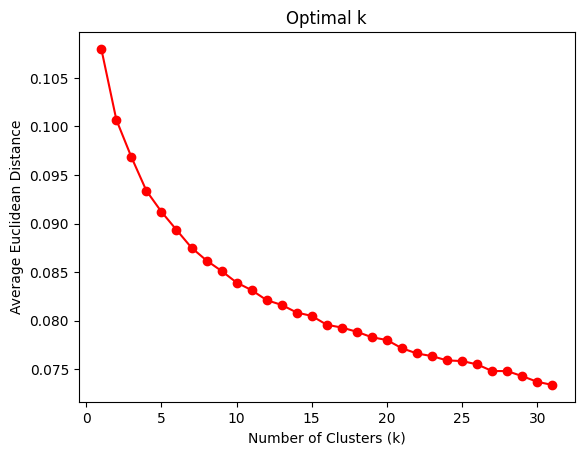

In [8]:
kValues = list(range(1, 32))
averageDistances = []

for k in kValues:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(mergedDataWithoutLabels)
    averageDistances.append(kmeans.inertia_ / len(mergedDataWithoutLabels))
plt.plot(kValues, averageDistances, marker='o', color='red')
plt.title('Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Euclidean Distance')
plt.show()

A3. Use Agglomerative Clustering for hierarchical clustering of your data. Plot the dendrogram to visualize the clusters.

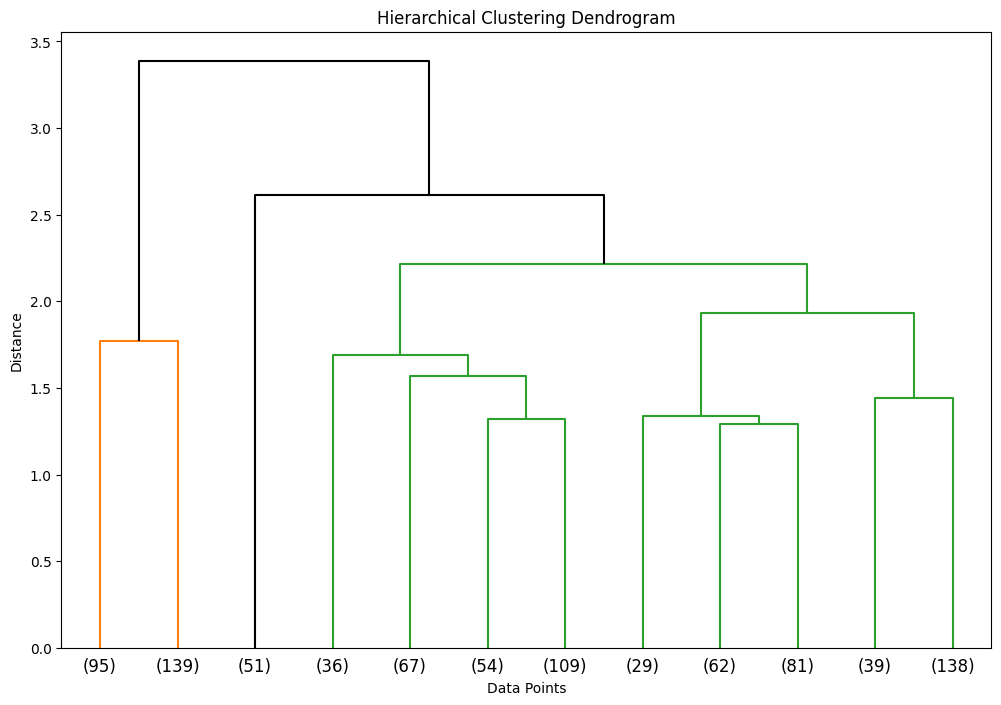

In [7]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
agg_cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='ward')
agg_labels = agg_cluster.fit_predict(mergedDataWithoutLabels)
linkage_matrix = linkage(mergedDataWithoutLabels, method='ward', metric='euclidean')
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, color_threshold=None, above_threshold_color='k', truncate_mode='lastp', p=12)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()